### From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
iris_dataset=pd.read_csv("C:/Users/Lenovo/Desktop/Desktop July 2020/Iris.csv")

In [3]:
iris_dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [5]:
#Pre-Screening the unnecessary variables
iris_dataset.drop(['Id'],axis=1,inplace=True)

In [6]:
cont_var=iris_dataset.select_dtypes(['float64'])
cat_var=iris_dataset.select_dtypes('O')

In [7]:
def cont_var_summary(x):
    n=x.count()
    nmiss=x.isnull().sum()
    avg=x.mean()
    med=x.median()
    variance=x.var()
    stdev=x.std()
    mini=x.min()
    p1=x.quantile(0.01)
    p5=x.quantile(0.05)
    p10=x.quantile(0.10)
    p25=x.quantile(0.25)
    p50=x.quantile(0.50)
    p75=x.quantile(0.75)
    p90=x.quantile(0.90)
    p95=x.quantile(0.95)
    p99=x.quantile(0.99)
    maxi=x.max()
    res=pd.Series([n,nmiss,avg,med,variance,stdev,mini,p1,p5,p10,p25,
                  p50,p75,p90,p95,p99,maxi],index=['N','NMiss','Mean','Median',
                                                  'Variance','StDev','Min','P1',
                                                  'P5','P10','P25','P50','P75',
                                                  'P90','P95','P99','Max'])
    return res

In [8]:
cont_var.apply(cont_var_summary)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
N,150.000000,150.000000,150.000000,150.000000
NMiss,0.000000,0.000000,0.000000,0.000000
Mean,5.843333,3.054000,3.758667,1.198667
Median,5.800000,3.000000,4.350000,1.300000
Variance,0.685694,0.188004,3.113179,0.582414
StDev,0.828066,0.433594,1.764420,0.763161
Min,4.300000,2.000000,1.000000,0.100000
P1,4.400000,2.200000,1.149000,0.100000
P5,4.600000,2.345000,1.300000,0.200000
P10,4.800000,2.500000,1.400000,0.200000


In [9]:
#No Missing Values, therefore, no need for missing value imputation

In [10]:
#No significant difference in different quantiles of values, therefore, 
#assuming no outlier presence 

In [11]:
#No categorical variables in the independent variables, therefore, no need for
#Dummy variables creation

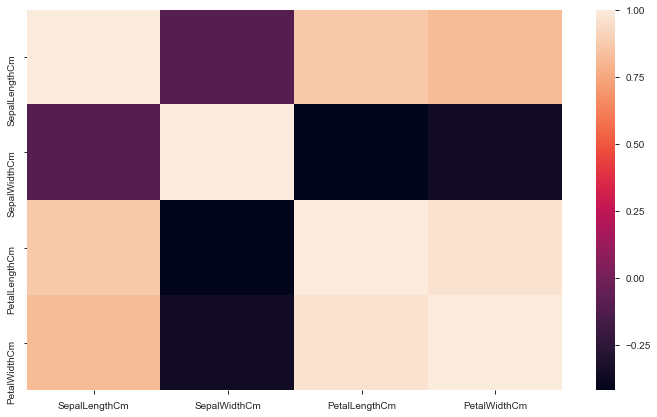

In [12]:
#Checking for correlation among independent variables
plt.figure(figsize=(12,7))
sns.heatmap(cont_var.corr())
plt.show()

In [13]:
iris_dataset=cont_var

In [14]:
#Train Test Split
train,test=train_test_split(iris_dataset,test_size=0.30,random_state=120293)
train.reset_index(drop=True,inplace=True)
test.reset_index(drop=True,inplace=True)

### Clustering

In [15]:
#Standardizing the data
iris_dataset_scaled=pd.DataFrame(StandardScaler().fit_transform(iris_dataset))

In [16]:
iris_dataset_scaled.head()

,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [17]:
#No need for dimensionality reduction techniques as there are only four independent variables

In [18]:
#Applying KMeans Algorithm
km_2=KMeans(n_clusters=2,random_state=120293).fit(iris_dataset_scaled)
km_3=KMeans(n_clusters=3,random_state=120293).fit(iris_dataset_scaled)
km_4=KMeans(n_clusters=4,random_state=120293).fit(iris_dataset_scaled)
km_5=KMeans(n_clusters=5,random_state=120293).fit(iris_dataset_scaled)
km_6=KMeans(n_clusters=6,random_state=120293).fit(iris_dataset_scaled)
km_7=KMeans(n_clusters=7,random_state=120293).fit(iris_dataset_scaled)
km_8=KMeans(n_clusters=8,random_state=120293).fit(iris_dataset_scaled)
km_9=KMeans(n_clusters=9,random_state=120293).fit(iris_dataset_scaled)
km_10=KMeans(n_clusters=10,random_state=120293).fit(iris_dataset_scaled)

In [19]:
iris_dataset['cluster_2']=km_2.labels_
iris_dataset['cluster_3']=km_3.labels_
iris_dataset['cluster_4']=km_4.labels_
iris_dataset['cluster_5']=km_5.labels_
iris_dataset['cluster_6']=km_6.labels_
iris_dataset['cluster_7']=km_7.labels_
iris_dataset['cluster_8']=km_8.labels_
iris_dataset['cluster_9']=km_9.labels_
iris_dataset['cluster_10']=km_10.labels_

In [20]:
#Evaluation

In [21]:
#Percentage of data in each cluster

In [22]:
iris_dataset.cluster_2.value_counts()/len(iris_dataset)

1    0.666667
0    0.333333
Name: cluster_2, dtype: float64

In [23]:
iris_dataset.cluster_3.value_counts()/len(iris_dataset)

2    0.353333
0    0.333333
1    0.313333
Name: cluster_3, dtype: float64

In [24]:
iris_dataset.cluster_4.value_counts()/len(iris_dataset)

0    0.353333
2    0.313333
1    0.180000
3    0.153333
Name: cluster_4, dtype: float64

In [25]:
iris_dataset.cluster_5.value_counts()/len(iris_dataset)

0    0.313333
2    0.186667
3    0.173333
4    0.166667
1    0.160000
Name: cluster_5, dtype: float64

In [26]:
iris_dataset.cluster_6.value_counts()/len(iris_dataset)

3    0.253333
1    0.193333
2    0.180000
4    0.153333
0    0.140000
5    0.080000
Name: cluster_6, dtype: float64

In [27]:
iris_dataset.cluster_7.value_counts()/len(iris_dataset)

5    0.220000
3    0.180000
2    0.160000
4    0.133333
1    0.120000
0    0.106667
6    0.080000
Name: cluster_7, dtype: float64

In [28]:
iris_dataset.cluster_8.value_counts()/len(iris_dataset)

0    0.173333
2    0.146667
4    0.140000
7    0.126667
6    0.126667
1    0.120000
3    0.086667
5    0.080000
Name: cluster_8, dtype: float64

In [29]:
iris_dataset.cluster_9.value_counts()/len(iris_dataset)

7    0.146667
4    0.133333
8    0.120000
3    0.120000
2    0.120000
1    0.120000
6    0.100000
0    0.080000
5    0.060000
Name: cluster_9, dtype: float64

In [30]:
iris_dataset.cluster_10.value_counts()/len(iris_dataset)

7    0.140000
4    0.133333
8    0.120000
3    0.120000
2    0.120000
1    0.106667
6    0.100000
0    0.080000
5    0.060000
9    0.020000
Name: cluster_10, dtype: float64

In [31]:
#Silhoutte Coefficient

In [32]:
km_2_score=metrics.silhouette_score(iris_dataset_scaled,km_2.labels_)
km_3_score=metrics.silhouette_score(iris_dataset_scaled,km_3.labels_)
km_4_score=metrics.silhouette_score(iris_dataset_scaled,km_4.labels_)
km_5_score=metrics.silhouette_score(iris_dataset_scaled,km_5.labels_)
km_6_score=metrics.silhouette_score(iris_dataset_scaled,km_6.labels_)
km_7_score=metrics.silhouette_score(iris_dataset_scaled,km_7.labels_)
km_8_score=metrics.silhouette_score(iris_dataset_scaled,km_8.labels_)
km_9_score=metrics.silhouette_score(iris_dataset_scaled,km_9.labels_)
km_10_score=metrics.silhouette_score(iris_dataset_scaled,km_10.labels_)
km_range=range(2,11)
scores=[km_2_score,km_3_score,km_4_score,km_5_score,km_6_score,km_7_score,km_8_score,km_9_score,km_10_score]

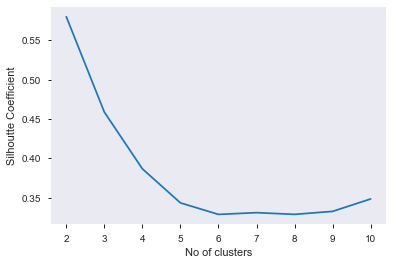

In [33]:
plt.plot(km_range,scores)
plt.xlabel('No of clusters')
plt.ylabel('Silhoutte Coefficient')
plt.grid()
plt.show()

In [34]:
#Elbow Analysis

In [35]:
cluster_errors=[km_2.inertia_,km_3.inertia_,km_4.inertia_,km_5.inertia_,km_6.inertia_,km_7.inertia_,km_8.inertia_,km_9.inertia_,km_10.inertia_]

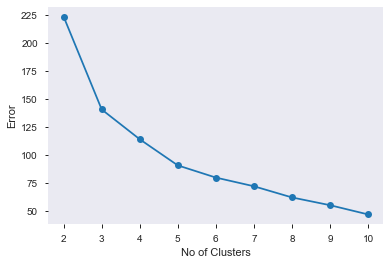

In [36]:
plt.plot(km_range,cluster_errors,marker='o')
plt.xlabel('No of Clusters')
plt.ylabel('Error')
plt.grid()
plt.show()

In [37]:
#Qualitative Analysis - Profiling

In [38]:
size=pd.concat([pd.Series(len(iris_dataset)),
          iris_dataset.cluster_2.value_counts().sort_index(),      
          iris_dataset.cluster_3.value_counts().sort_index(),
          iris_dataset.cluster_4.value_counts().sort_index(),
          iris_dataset.cluster_5.value_counts().sort_index(),
          iris_dataset.cluster_6.value_counts().sort_index(),
          iris_dataset.cluster_7.value_counts().sort_index(),
          iris_dataset.cluster_8.value_counts().sort_index(),
          iris_dataset.cluster_9.value_counts().sort_index(),
          iris_dataset.cluster_10.value_counts().sort_index()])

In [39]:
seg_size=pd.DataFrame(size,columns=['seg_size'])
seg_pct=pd.DataFrame(size/len(iris_dataset),columns=['seg_pct'])
seg_pct.T

,0,0,1,0,1,2,0,1,2,3,...,0,1,2,3,4,5,6,7,8,9
seg_pct,1.0,0.333333,0.666667,0.333333,0.313333,0.353333,0.353333,0.18,0.313333,0.153333,...,0.08,0.106667,0.12,0.12,0.133333,0.06,0.1,0.14,0.12,0.02


In [40]:
pd.concat([seg_size.T,seg_pct.T])

,0,0,1,0,1,2,0,1,2,3,...,0,1,2,3,4,5,6,7,8,9
seg_size,150.0,50.000000,100.000000,50.000000,47.000000,53.000000,53.000000,27.00,47.000000,23.000000,...,12.00,16.000000,18.00,18.00,20.000000,9.00,15.0,21.00,18.00,3.00
seg_pct,1.0,0.333333,0.666667,0.333333,0.313333,0.353333,0.353333,0.18,0.313333,0.153333,...,0.08,0.106667,0.12,0.12,0.133333,0.06,0.1,0.14,0.12,0.02


In [41]:
profiling_output=pd.concat([iris_dataset.apply(lambda x: x.mean()),
           iris_dataset.groupby('cluster_2').apply(lambda x: x.mean()).T,
           iris_dataset.groupby('cluster_3').apply(lambda x: x.mean()).T,
           iris_dataset.groupby('cluster_4').apply(lambda x: x.mean()).T,
           iris_dataset.groupby('cluster_5').apply(lambda x: x.mean()).T,
           iris_dataset.groupby('cluster_6').apply(lambda x: x.mean()).T,
           iris_dataset.groupby('cluster_7').apply(lambda x: x.mean()).T,
           iris_dataset.groupby('cluster_8').apply(lambda x: x.mean()).T,
           iris_dataset.groupby('cluster_9').apply(lambda x: x.mean()).T,
           iris_dataset.groupby('cluster_10').apply(lambda x: x.mean()).T],axis=1)
profiling_output

,0,0,1,0,1,2,0,1,2,3,...,0,1,2,3,4,5,6,7,8,9
SepalLengthCm,5.843333,5.006,6.262,5.006,6.780851,5.801887,5.801887,4.785185,6.780851,5.265217,...,5.391667,6.61250,5.711111,4.700000,5.050,7.433333,5.513333,6.423810,6.127778,7.600000
SepalWidthCm,3.054000,3.418,2.872,3.418,3.095745,2.673585,2.673585,3.151852,3.095745,3.730435,...,3.925000,3.17500,2.827778,3.038889,3.455,2.922222,2.353333,3.042857,2.711111,3.733333
PetalLengthCm,3.758667,1.464,4.906,1.464,5.510638,4.369811,4.369811,1.455556,5.510638,1.473913,...,1.525000,5.51250,4.200000,1.405556,1.480,6.266667,3.893333,4.723810,5.200000,6.400000
PetalWidthCm,1.198667,0.244,1.676,0.244,1.972340,1.413208,1.413208,0.211111,1.972340,0.282609,...,0.275000,2.25625,1.305556,0.183333,0.280,1.988889,1.193333,1.533333,1.850000,2.233333
cluster_2,0.666667,0.000,1.000,0.000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,1.00000,1.000000,0.000000,0.000,1.000000,1.000000,1.000000,1.000000,1.000000
cluster_3,1.020000,0.000,1.530,0.000,1.000000,2.000000,2.000000,0.000000,1.000000,0.000000,...,0.000000,1.00000,2.000000,0.000000,0.000,1.000000,2.000000,1.333333,1.722222,1.000000
cluster_4,1.266667,1.920,0.940,1.920,2.000000,0.000000,0.000000,1.000000,2.000000,3.000000,...,3.000000,2.00000,0.000000,1.000000,2.100,2.000000,0.000000,1.333333,0.555556,2.000000
cluster_5,1.720000,2.040,1.560,2.040,1.191489,1.886792,1.886792,2.925926,1.191489,1.000000,...,1.000000,1.87500,2.000000,3.000000,1.800,2.000000,4.000000,0.095238,0.222222,2.000000
cluster_6,2.326667,2.920,2.030,2.920,2.276596,1.811321,1.811321,3.703704,2.276596,2.000000,...,2.000000,1.00000,2.000000,4.000000,2.500,5.000000,0.000000,1.952381,2.777778,5.000000
cluster_7,3.093333,3.400,2.940,3.400,3.319149,2.603774,2.603774,2.000000,3.319149,5.043478,...,6.000000,3.12500,3.500000,1.000000,4.000,3.000000,2.000000,5.000000,0.555556,3.000000


In [42]:
profiling_output_final=pd.concat([seg_size.T,seg_pct.T,profiling_output])
profiling_output_final

,0,0,1,0,1,2,0,1,2,3,...,0,1,2,3,4,5,6,7,8,9
seg_size,150.000000,50.000000,100.000000,50.000000,47.000000,53.000000,53.000000,27.000000,47.000000,23.000000,...,12.000000,16.000000,18.000000,18.000000,20.000000,9.000000,15.000000,21.000000,18.000000,3.000000
seg_pct,1.000000,0.333333,0.666667,0.333333,0.313333,0.353333,0.353333,0.180000,0.313333,0.153333,...,0.080000,0.106667,0.120000,0.120000,0.133333,0.060000,0.100000,0.140000,0.120000,0.020000
SepalLengthCm,5.843333,5.006000,6.262000,5.006000,6.780851,5.801887,5.801887,4.785185,6.780851,5.265217,...,5.391667,6.612500,5.711111,4.700000,5.050000,7.433333,5.513333,6.423810,6.127778,7.600000
SepalWidthCm,3.054000,3.418000,2.872000,3.418000,3.095745,2.673585,2.673585,3.151852,3.095745,3.730435,...,3.925000,3.175000,2.827778,3.038889,3.455000,2.922222,2.353333,3.042857,2.711111,3.733333
PetalLengthCm,3.758667,1.464000,4.906000,1.464000,5.510638,4.369811,4.369811,1.455556,5.510638,1.473913,...,1.525000,5.512500,4.200000,1.405556,1.480000,6.266667,3.893333,4.723810,5.200000,6.400000
PetalWidthCm,1.198667,0.244000,1.676000,0.244000,1.972340,1.413208,1.413208,0.211111,1.972340,0.282609,...,0.275000,2.256250,1.305556,0.183333,0.280000,1.988889,1.193333,1.533333,1.850000,2.233333
cluster_2,0.666667,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
cluster_3,1.020000,0.000000,1.530000,0.000000,1.000000,2.000000,2.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,2.000000,0.000000,0.000000,1.000000,2.000000,1.333333,1.722222,1.000000
cluster_4,1.266667,1.920000,0.940000,1.920000,2.000000,0.000000,0.000000,1.000000,2.000000,3.000000,...,3.000000,2.000000,0.000000,1.000000,2.100000,2.000000,0.000000,1.333333,0.555556,2.000000
cluster_5,1.720000,2.040000,1.560000,2.040000,1.191489,1.886792,1.886792,2.925926,1.191489,1.000000,...,1.000000,1.875000,2.000000,3.000000,1.800000,2.000000,4.000000,0.095238,0.222222,2.000000


In [43]:
profiling_output_final.to_csv('C:/Users/Lenovo/Desktop/profiling_output.csv')

### Visualizing Results

In [44]:
#Applying PCA so that results can be visualized in a 2-Dimensional plane

In [45]:
pc=PCA(n_components=2).fit(iris_dataset_scaled)
reduced_comp=pc.fit_transform(iris_dataset_scaled)
iris_reduced_comp=pd.DataFrame(reduced_comp)
iris_reduced_comp.columns=['C1','C2']
iris_reduced_comp.head()

,C1,C2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [46]:
iris_reduced_comp['cluster_2']=iris_dataset['cluster_2']
iris_reduced_comp['cluster_3']=iris_dataset['cluster_3']
iris_reduced_comp['cluster_4']=iris_dataset['cluster_4']
iris_reduced_comp['cluster_5']=iris_dataset['cluster_5']
iris_reduced_comp['cluster_6']=iris_dataset['cluster_6']
iris_reduced_comp['cluster_7']=iris_dataset['cluster_7']
iris_reduced_comp['cluster_8']=iris_dataset['cluster_8']
iris_reduced_comp['cluster_9']=iris_dataset['cluster_9']
iris_reduced_comp['cluster_10']=iris_dataset['cluster_10']

In [47]:
iris_reduced_comp.head()

,C1,C2,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10
0,-2.264542,0.505704,0,0,3,1,2,4,7,4,4
1,-2.086426,-0.655405,0,0,1,3,4,1,1,3,3
2,-2.367950,-0.318477,0,0,1,3,4,1,1,3,3
3,-2.304197,-0.575368,0,0,1,3,4,1,1,3,3
4,-2.388777,0.674767,0,0,3,1,2,4,7,4,4


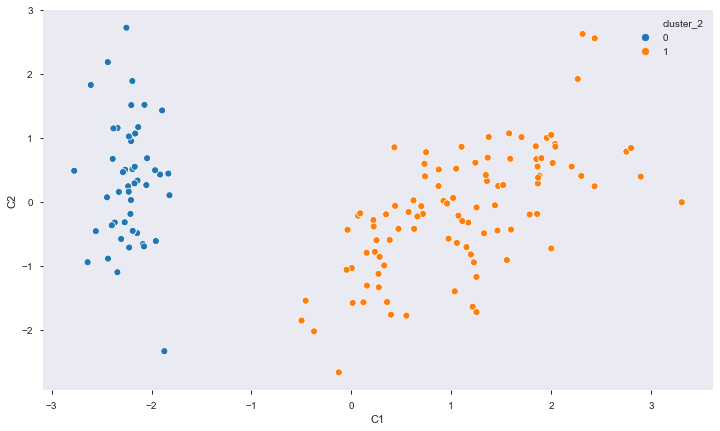

In [48]:
plt.figure(figsize=(12,7))
plt.grid()
sns.scatterplot(data=iris_reduced_comp,x='C1',y='C2',hue='cluster_2')
plt.show()

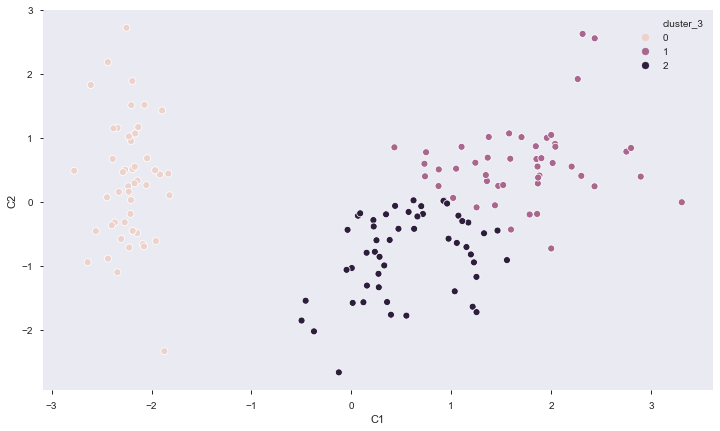

In [49]:
plt.figure(figsize=(12,7))
plt.grid()
sns.scatterplot(data=iris_reduced_comp,x='C1',y='C2',hue='cluster_3')
plt.show()